In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error

## Obtaining the Data

Source: Downloaded from [Kaggle California Housing Prices](https://www.kaggle.com/datasets/camnugent/california-housing-prices/data)

In [3]:
housing = pd.read_csv('./data/housing.csv')
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


## Exploratory Data Analysis (EDA)

 An approach to analyzing data sets to summarize their main characteristics, often with visual methods.

**1. Explore statistics**

In [4]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


**2. Create three Seaborn scatter plots**

Text(0.5, 1.0, 'Median House Value vs. Median Income in California')

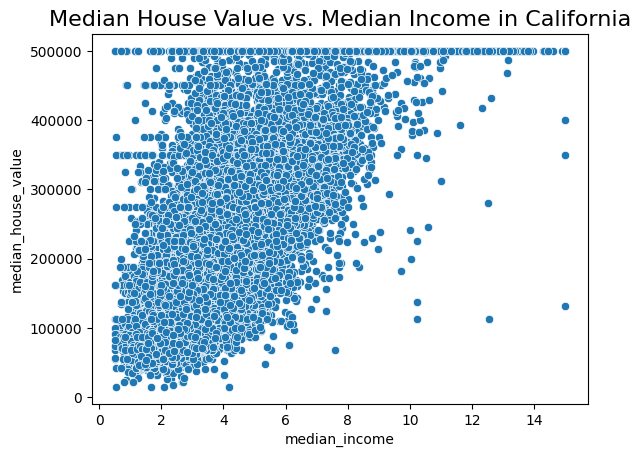

In [8]:
sns.scatterplot(x="median_income", y="median_house_value", data=housing, )
plt.title("Median House Value vs. Median Income in California", fontsize=16)

- Positive correlation: Median house value and median income are positively correlated.
- Non-linearity: The relationship might be non-linear, especially at higher income levels.
- Outliers: Be mindful of outliers that might affect the model.
- Remove all data points where the house value exceeds 500,000

Text(0.5, 1.0, 'Median House Value vs. Population in California')

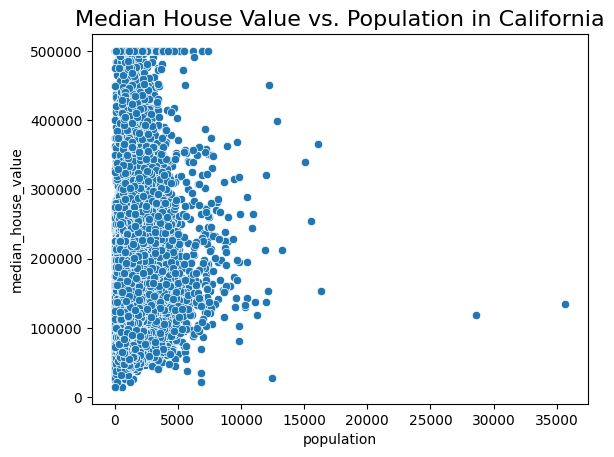

In [9]:
sns.scatterplot(x="population", y="median_house_value", data=housing, )
plt.title("Median House Value vs. Population in California", fontsize=16)

- Weak positive correlation: There's a weak positive correlation between median house value and population.
- Clustering: Data points cluster at lower population levels, with fewer points at higher populations.
- Outliers: A few outliers exist, especially at higher house values and lower populations.

Text(0.5, 1.0, 'Median House Value vs. households in California')

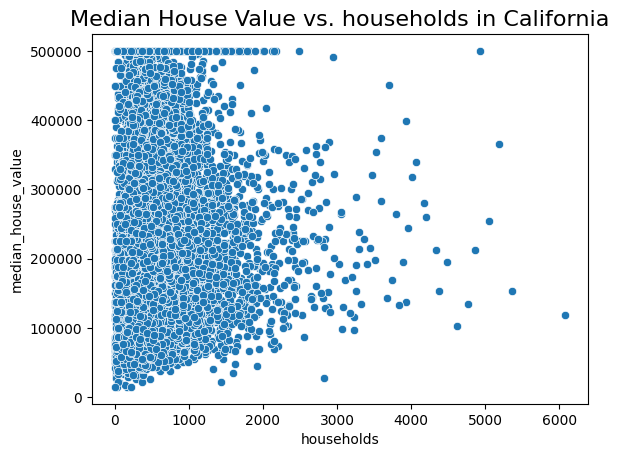

In [13]:
sns.scatterplot(x="households", y="median_house_value", data=housing, )
plt.title("Median House Value vs. households in California", fontsize=16)

Key Findings:

- Weak positive correlation: There's a weak positive correlation between median house value and households.
- Clustering: Data points cluster at lower household levels, with fewer points at higher households.
- Outliers: A few outliers exist, especially at higher house values and lower households.

Insights for Linear Regression:

- Simple linear regression: A basic linear model might be suitable due to the weak correlation.
- Non-linearity: Explore non-linear models or transformations if the relationship is non-linear.
- Outlier handling: Address outliers to improve model accuracy.
- Model evaluation: Use metrics like MSE, RMSE, and R-squared.

**3. Describe the 4 variables**
- 1. Median House Value:

Meaning: The average value of houses in a given area.
Range: Appears to range from 0 to around 500,000 (based on the plots).
Observations: The distribution is skewed right, with a concentration of values at the lower end and a few outliers at the higher end.
- 2. Median Income:

Meaning: The average income of households in a given area.
Range: Appears to range from 0 to around 15 (likely in units of thousands of dollars).
Observations: The distribution is skewed right, with a concentration of values at the lower end.
- 3. Population:

Meaning: The total number of people residing in a given area.
Range: Appears to range from 0 to around 35,000.
Observations: The distribution is skewed right, with a concentration of values at the lower end and a few outliers at the higher end.
- 4. Households:

Meaning: The number of households in a given area.
Range: Appears to range from 0 to around 6000.
Observations: The distribution is skewed right, with a concentration of values at the lower end.
Overall Observations:

All variables exhibit a skewed right distribution, indicating a concentration of values at the lower end and a few outliers at the higher end.
The range of each variable varies, reflecting different scales of measurement.
The relationships between these variables seem to be complex and may involve non-linear patterns or interactions.